### Import Libraries

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

2024-12-27 15:16:15.463129: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-27 15:16:15.475069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735292775.489567   11425 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735292775.495267   11425 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-27 15:16:15.510976: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
import plotly.express as px

### Importing the dataset

In [3]:
#reading the fake and true datasets
final_d=pd.read_csv("New_Dataframe.csv")
final_d

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
84870,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
84871,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
84872,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
84873,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


### Preprocessing and Cleaning

In [4]:
final_d.label.value_counts()

label
1    50084
0    34791
Name: count, dtype: int64

In [5]:
# divide the major and minor classes

df_minority = final_d[final_d['label'] == 0]
df_majority = final_d[final_d['label']== 1]

In [6]:
### Upsampling

from sklearn.utils import resample

df_up_sampled = resample(df_minority, n_samples=50084, random_state=123456)
df_up_sampled

,title,text,label
12847,Turkish court frees opposition journalist on b...,ISTANBUL (Reuters) - A Turkish court freed on ...,0
44381,Trump builds team of bosses to shake up Washin...,WASHINGTON (Reuters) - With more than 20 nomi...,0
37183,Twitter Shares Crash Following Quarterly Earni...,Twitter shares crashed on Thursday following t...,0
47568,Major U.S. Jewish Groups Applaud Trump’s Holoc...,The Algemeiner reports: Leading American Jewis...,0
50374,GRAPHIC VIDEO Shows White Officer Shooting Una...,North Charleston Police Officer Michael T. Sla...,0
...,...,...,...
38048,Iraqi forces complete Kirkuk province takeover...,"BAGHDAD/ERBIL, Iraq (Reuters) - Iraqi forces o...",0
28287,"Army Triumphs at Last, Ending Navy’s 14-Game S...",BALTIMORE — Tradition at the game calls f...,0
32732,Senate race rankings: Dems attack as GOP lays ...,The move would make it easier for the Trump ad...,0
55399,Jailed Kremlin critic calls on Russians to pro...,MOSCOW (Reuters) - Kremlin critic Alexei Naval...,0


In [7]:
# contact both the majority class and up sample data frame
final_data= pd.concat([df_majority, df_up_sampled])
final_data

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
38048,Iraqi forces complete Kirkuk province takeover...,"BAGHDAD/ERBIL, Iraq (Reuters) - Iraqi forces o...",0
28287,"Army Triumphs at Last, Ending Navy’s 14-Game S...",BALTIMORE — Tradition at the game calls f...,0
32732,Senate race rankings: Dems attack as GOP lays ...,The move would make it easier for the Trump ad...,0
55399,Jailed Kremlin critic calls on Russians to pro...,MOSCOW (Reuters) - Kremlin critic Alexei Naval...,0


In [8]:
final_data.isna().sum()

title    518
text      39
label      0
dtype: int64

In [9]:
final_data=final_data.dropna()

In [10]:
final_data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
final_data.label.value_counts()

label
0    50084
1    49527
Name: count, dtype: int64

#### Concatenating title and text of news

In [12]:
final_data["text"]=final_data["title"]+final_data["text"]

In [13]:
new_dataset=final_data[["text","label"]]

In [14]:
new_dataset.sample(5)

,text,label
46587,Islamic State claims responsibility for the Br...,0
52315,U.S. judge aims to quickly decide lawsuits ove...,0
60783,Aid workers to return to Yemen at weekend but ...,0
8454,House Intelligence Chair Nunes: Surveillance o...,0
4300,Merkel looks secure for now despite coalition ...,0


### Text Preprocessing

In [15]:
#Creating a copy 
clean_news=new_dataset.copy()

In [16]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [17]:
clean_news['text']=clean_news['text'].apply(lambda x:review_cleaning(x))
clean_news.head()

,text,label
0,law enforcement on high alert following threat...,1
2,unbelievable obama’s attorney general says mos...,1
4,satan russia unvelis an image of its terrifyi...,1
5,about time christian group sues amazon and spl...,1
6,dr ben carson targeted by the irs “i never had...,1


#### News - Stopwords

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sunbeam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop = stopwords.words('english')
clean_news['text'] = clean_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,text,label
0,law enforcement high alert following threats c...,1
2,unbelievable obama’s attorney general says cha...,1
4,satan russia unvelis image terrifying new ‘sup...,1
5,time christian group sues amazon splc designat...,1
6,dr ben carson targeted irs “i never audit spok...,1


said 392333
trump 306713
us 162317
would 153830
president 123078
people 112302
new 108291
one 105687
mr 99557
state 91551
also 89266
clinton 82558
states 75515
government 74991
could 72593
house 72049
reuters 66253
united 64996
like 64708
republican 64208


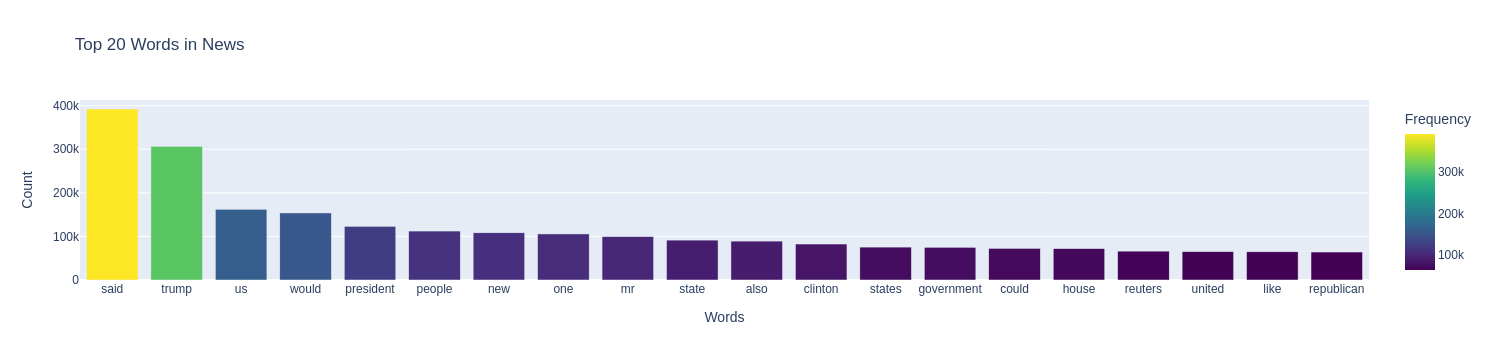

In [20]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['text'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
# Creating the DataFrame of words and frequency
df1 = pd.DataFrame(common_words, columns=['word', 'count'])

# Plotting using Plotly for better visualization
fig = px.bar(df1, x='word', y='count', title='Top 20 Words in News',
             labels={'word': 'Words', 'count': 'Frequency'},
             color='count', color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(yaxis_title='Count', xaxis_title='Words')
fig.show()

donald trump 52302
united states 51963
white house 36395
new york 34437
mr trump 25724
hillary clinton 23737
north korea 16673
president donald 16388
last year 14032
islamic state 13488
prime minister 12935
trump said 12921
last week 12805
barack obama 12590
said statement 12018
supreme court 11143
we re 10196
said would 10075
secretary state 9916
national security 9566


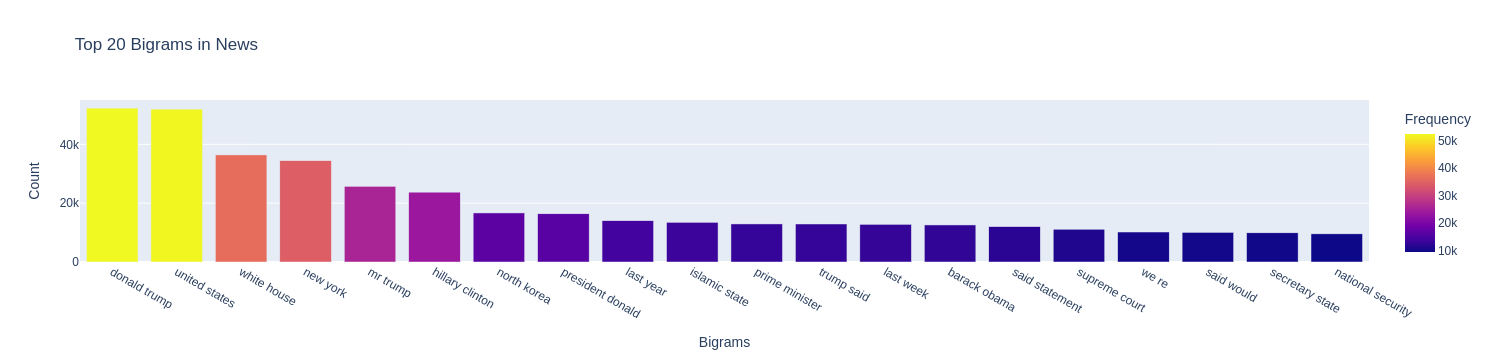

In [21]:
#Function to get top bigram words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_bigrams = get_top_n_bigram(clean_news['text'], 20)

#Printing the word and frequency
for bigram, freq in common_bigrams:
    print(bigram, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

# Plotting using Plotly for better visualization
fig = px.bar(df3, x='bigram', y='count', title='Top 20 Bigrams in News',
             labels={'bigram': 'Bigrams', 'count': 'Frequency'},
             color='count')

fig.update_layout(yaxis_title='Count', xaxis_title='Bigrams')
fig.show()

In [22]:
#Function to get top trigram words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming clean_news is a DataFrame with a column 'news'
common_trigrams = get_top_n_trigram(clean_news['text'], 20)

# Printing the trigram and frequency
for trigram, freq in common_trigrams:
    print(trigram, freq)

# Creating the DataFrame of trigrams and frequency
df6 = pd.DataFrame(common_trigrams, columns=['trigram', 'count'])

# Plotting using Plotly for better visualization
fig = px.bar(df6, x='trigram', y='count', title='Top 20 Trigrams in News',
             labels={'trigram': 'Trigrams', 'count': 'Frequency'},
             color='count')

fig.update_layout(yaxis_title='Count', xaxis_title='Trigrams')
fig.show()

president donald trump 16193
president barack obama 8957
new york times 5978
reuters president donald 3657
new york city 2973
president vladimir putin 2664
white house said 2599
affordable care act 2567
presidentelect donald trump 2283
speaker paul ryan 2216
national security adviser 2208
president united states 2152
donald trump realdonaldtrump 1956
director james comey 1919
russian president vladimir 1877
state rex tillerson 1809
donald trump said 1806
secretary state rex 1794
leader mitch mcconnell 1732
president george bush 1694


### Stemming & Vectorizing

In [23]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['text']].reset_index(drop=True)
news_features.head()


,text
0,law enforcement high alert following threats c...
1,unbelievable obama’s attorney general says cha...
2,satan russia unvelis image terrifying new ‘sup...
3,time christian group sues amazon splc designat...
4,dr ben carson targeted irs “i never audit spok...


In [24]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['text'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)   


In [25]:
corpus[1]

'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina demonstr gather last night exercis constitut protect right peac protest order rais issu creat chang loretta lynch aka eric holder skirt'

### TFIDF(Term Frequency — Inverse Document Frequency)

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['text'])
X.shape

(99611, 5000)

In [27]:
#Getting the target variable
y=clean_news['label']

In [28]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 50084, 1: 49527})


### Train-test split(75:25)

In [29]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123456)

### Model Building: Fake News Classifier

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.6560403259925112
Decision Tree Test Accuracy: 0.6653365864272793
KNN Test Accuracy: 0.5839004309136488
Naive Bayes Test Accuracy: 0.6564719843648006


### Logistic Regression with Hyperparameter Tuning

In [32]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))


/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

LogisticRegression(C=0.2682695795279725, random_state=0)
The mean accuracy of the model is: 0.7012006585551942


In [33]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.69


### Confusion Matrix

Confusion matrix, without normalization


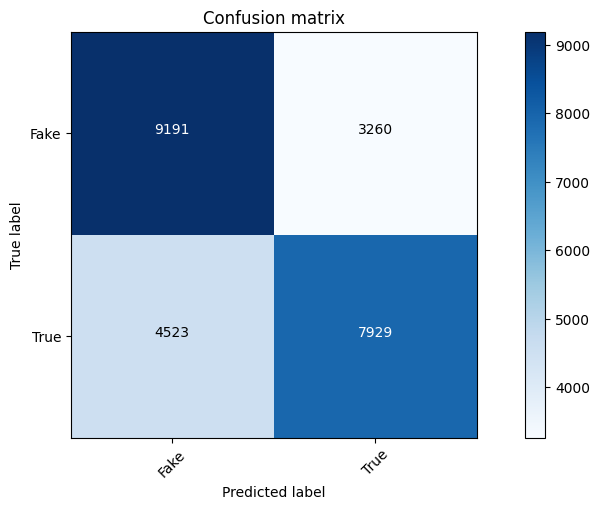

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])


### Classification Report

In [35]:
print("Classification Report:\n",classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70     12451
           1       0.71      0.64      0.67     12452

    accuracy                           0.69     24903
   macro avg       0.69      0.69      0.69     24903
weighted avg       0.69      0.69      0.69     24903



#### ROC-AUC Curve

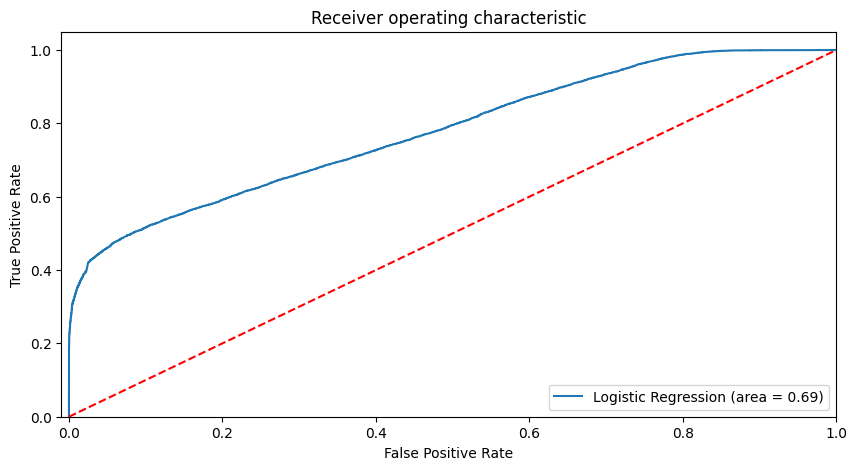

In [36]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Deep learning-LSTM

### One hot for Embedding layers

In [37]:
corpus[1]

'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina demonstr gather last night exercis constitut protect right peac protest order rais issu creat chang loretta lynch aka eric holder skirt'

In [38]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

### Padding embedded documents

In [39]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  398 9374 4255]
 [   0    0    0 ... 1651 1641 8396]
 [   0    0    0 ... 1970 6712 1135]
 ...
 [   0    0    0 ... 9826 4355  428]
 [   0    0    0 ... 2831  997 3649]
 [   0    0    0 ... 3894 8255 3924]]


In [40]:
embedded_docs[1]

array([   0,    0,    0, ..., 1651, 1641, 8396], dtype=int32)

## LSTM Model

In [41]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


2024-12-27 15:41:16.289097: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
len(embedded_docs),y.shape

(99611, (99611,))

### Fitting the LSTM Model

In [43]:
# Converting the X and y as array
 X_final=np.array(embedded_docs)
 y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape


IndentationError: unexpected indent (2010201391.py, line 2)

In [ ]:
from sklearn.model_selection import train_test_split
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.30, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=64)

### Evaluation of model

In [ ]:
#Checking for accuracy
accuracy_score(y_test,y_pred)